# Big Market Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv(r'C:\Users\Anas Ansari\Desktop\big-mart-sales-prediction\train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
data.shape

(8523, 12)

# Filling nan Values

In [5]:
mean_Item_weight=data['Item_Weight'].mean()   #mean of the item weight
mean_Item_weight

12.857645184136183

In [6]:
data['Item_Weight'] = data['Item_Weight'].fillna(mean_Item_weight) #replacing the nan values with mean of the item weight
data['Outlet_Size'] = data['Outlet_Size'].fillna('Not Provided')

In [7]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
data.loc[data['Item_Fat_Content']== 'LF','Item_Fat_Content'] = 'Low Fat'
data.loc[data['Item_Fat_Content']== 'low fat','Item_Fat_Content'] = 'Low Fat'
data.loc[data['Item_Fat_Content']== 'reg','Item_Fat_Content'] = 'Regular'

In [11]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Item_Fat_Content vs Item_Outlet_Sales

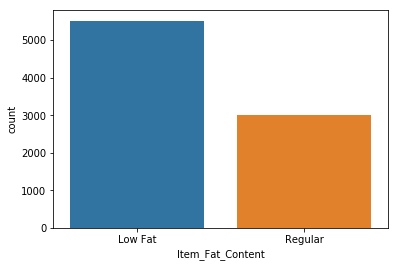

In [27]:
sns.countplot(data["Item_Fat_Content"])
plt.show()

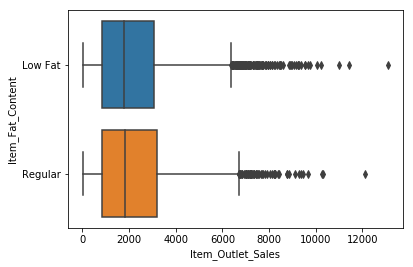

In [12]:
sns.boxplot(data['Item_Outlet_Sales'],data['Item_Fat_Content'])

# Item_Outlet_Sales Vs Item_Type

In [13]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

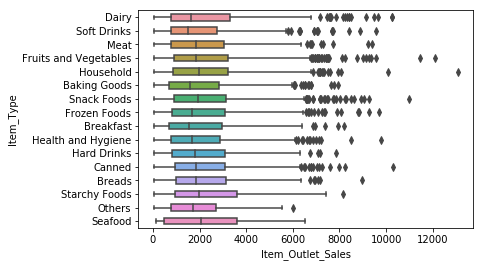

In [14]:
sns.boxplot(data['Item_Outlet_Sales'],data['Item_Type'],width=0.5)

# Item_Outlet_Sales Vs Outlet_Size

Medium          2793
Not Provided    2410
Small           2388
High             932
Name: Outlet_Size, dtype: int64


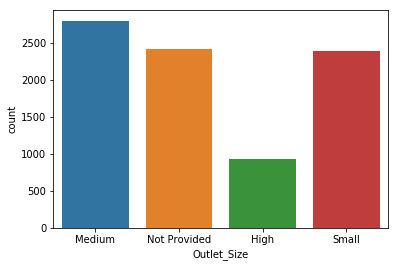

In [35]:
size=data['Outlet_Size'].value_counts()
print(size)
sns.countplot(data["Outlet_Size"])

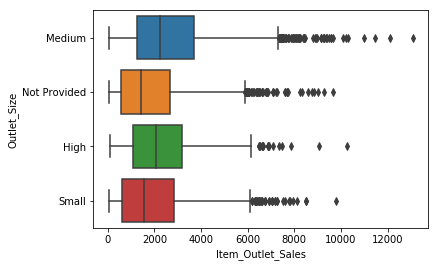

In [15]:
sns.boxplot(data['Item_Outlet_Sales'],data['Outlet_Size'])

# Highest Sales by Outlet Type and outlet location

In [16]:
grouped = data['Item_Outlet_Sales'].groupby([data['Outlet_Type'],data['Outlet_Location_Type']]) #groupby([df['key1'],df['key2']])
a=grouped.max()
sort=a.sort_values(axis=0,ascending=False)

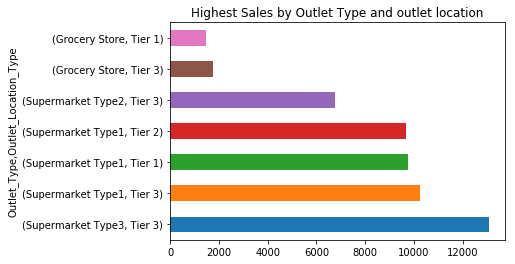

In [17]:
sort.plot(kind='barh',title='Highest Sales by Outlet Type and outlet location')

# Sales in every year

In [18]:
a=data['Outlet_Establishment_Year'].value_counts()
a.sort_values()

1998     555
2007     926
2009     928
2002     929
1999     930
1997     930
2004     930
1987     932
1985    1463
Name: Outlet_Establishment_Year, dtype: int64

In [19]:
sale_year=data.pivot_table(['Item_Outlet_Sales'],index=['Outlet_Establishment_Year'],aggfunc=sum).round()  
sale_year.sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3633620.0
2004,2268123.0
1999,2183970.0
2007,2167465.0
1987,2142664.0
1997,2118395.0
2002,2036725.0
2009,1851823.0
1998,188340.0


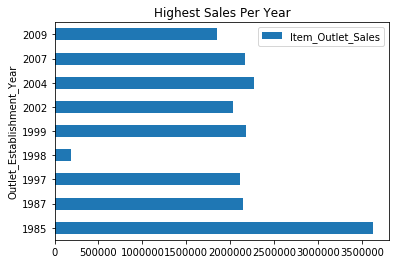

In [24]:
sale_year.plot(kind='barh',title='Highest Sales Per Year')